In [1]:
import pandas as pd
from collections import Counter
from itertools import chain
import pm4py

In [2]:
df_verslagen_clean = pd.read_csv('a:/df_verslagen_cleaned.csv')
df_verslagen_clean.head()

,pseudo_id,verslagen_report_tags,verslagen_report_content,verslagen_report_start_date,verslagen_report_content_cleaned,content_words,content_words_lemmatized
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Klinische Brief,"Dhr. A.J. Dingemans, huisarts\r\n[STREETNAME] ...",2020-11-26 15:06:00,dhr aj dingemans huisarts streetname nr city d...,"['dhr', 'aj', 'dingemans', 'huisarts', 'street...","['dhr', 'aj', 'dingemans', 'huisarts', 'street..."
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Kliniek: vervolgconsult",Samenvatting: \nRectaal bloedverlies obv diver...,2020-11-26 09:53:00,samenvatting rectaal bloedverlies obv divertik...,"['samenvatting', 'rectaal', 'bloedverlies', 'o...","['samenvatting', 'rectaal', 'bloedverlie', 'ob..."
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,COLOSCOPIE\r\n\r\nBetreft\r\nMw. [INITIALS] [L...,2020-11-25 14:13:00,coloscopie betreft mw initials lastname adresg...,"['coloscopie', 'betreft', 'mw', 'initials', 'l...","['coloscopie', 'betreffen', 'mw', 'initials', ..."
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,GASTROSCOPIE\r\n\r\nBetreft\r\nMw. [INITIALS] ...,2020-11-25 13:48:00,gastroscopie betreft mw initials lastname adre...,"['gastroscopie', 'betreft', 'mw', 'initials', ...","['gastroscopie', 'betreffen', 'mw', 'initials'..."
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Kliniek: vervolgconsult",Samenvatting: \nRectaal bloedverlies ; eenmali...,2020-11-25 08:47:00,samenvatting rectaal bloedverlies eenmalig hd ...,"['samenvatting', 'rectaal', 'bloedverlies', 'e...","['samenvatting', 'rectaal', 'bloedverlie', 'ee..."


In [3]:
df_verslagen = pd.read_csv('a:/bloeding-met-patientenlijst-2/bloeding-met-patientenlijst-4-verslagen.csv')

df_verslagen = df_verslagen.drop(columns=['verslagen_report_content'])
df_verslagen.head()

,pseudo_id,verslagen_report_tags,verslagen_report_start_date
0,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Klinische Brief,2020-11-26 15:06:00
1,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Kliniek: vervolgconsult",2020-11-26 09:53:00
2,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,2020-11-25 14:13:00
3,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,Poliklinische Brief,2020-11-25 13:48:00
4,046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6,"Consult, Kliniek: vervolgconsult",2020-11-25 08:47:00


In [4]:
# Step 1: Sort by Patient_ID and Timestamp
df_verslagen = df_verslagen.sort_values(by=['pseudo_id', 'verslagen_report_start_date'])

# Step 2: Create a list of sequences for each patient
patient_sequences = df_verslagen.groupby('pseudo_id')['verslagen_report_tags'].apply(lambda x: '->'.join(x))

# Step 3: Count the occurrences of each unique sequence
sequence_counts = Counter(patient_sequences)

# Step 4: Convert to DataFrame for better visualization
sequence_df = pd.DataFrame(sequence_counts.items(), columns=['Sequence', 'Count'])

# Step 5: Sort by most frequent sequences
sequence_df = sequence_df.sort_values(by='Count', ascending=False)

print(sequence_df)


                                              Sequence  Count
0    Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
1    Consult, SEH->Consult, SEH->Consult, Kliniek: ...      1
2    Consult, SEH->Spoedeisende Hulp->Consult, Klin...      1
3    Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
4    Consult, SEH->Consult->Consult->Consult, Overi...      1
..                                                 ...    ...
100  Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
101  Consult, SEH->Consult, SEH->Consult, Overige a...      1
102  Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
103  Consult, SEH->Consult, SEH->Consult, Kliniek: ...      1
104  Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1

[105 rows x 2 columns]


In [5]:
# Flatten all steps into a single list
all_steps = list(chain(*df_verslagen.groupby('pseudo_id')['verslagen_report_tags'].apply(list)))

# Count step frequency
step_counts = Counter(all_steps)
print(step_counts)


Counter({'Consult, Kliniek: vervolgconsult': 2249, 'Consult, Polikliniek: vervolgconsult': 1993, 'Consult': 1577, 'Consult, SEH': 1227, 'Consult, Overige aantekeningen': 682, 'Poliklinische Brief': 481, 'Consult, Telefonisch consult': 452, 'Klinische Brief': 318, 'Spoedeisende Hulp': 250, 'Consult, Kliniek: eerste consult': 139, 'Consult, Polikliniek: eerste consult': 128, 'Consult, Samenvatting': 16, 'Consult, Thuisbehandeling': 14, 'Algemeen': 14, 'Consult, Intercollegiaal consult': 12, 'Consult, Multidisciplinair overleg': 11, 'Consult, Dagbehandeling': 9, 'Radiologieverslag, ECG': 1, 'Consult, Research': 1, 'Radiologieverslag, ECG kliniek': 1, 'Radiologieverslag, Heup links': 1, 'Radiologieverslag, CT colonografie': 1})


In [6]:
# pip install pm4py

In [7]:
# Convert DataFrame to PM4Py event log
event_log = pm4py.format_dataframe(df_verslagen, case_id='pseudo_id', activity_key='verslagen_report_tags', timestamp_key='verslagen_report_start_date')

print(event_log.head())  # Verify format

                                  pseudo_id verslagen_report_tags  \
0  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
1  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
2  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
3  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   
4  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6          Consult, SEH   

  verslagen_report_start_date                         case:concept:name  \
0   2013-10-21 10:24:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
1   2013-10-21 10:40:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
2   2013-10-21 10:41:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
3   2013-10-21 10:50:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   
4   2013-10-22 19:59:00+00:00  046D1FFEBDD40E1665D0ABA6DD8FC9F8BC4351C6   

   concept:name            time:timestamp  @@index  @@case_index  
0  Consult, SEH 2013-10-21 10:24:00+00:00        0             0  


In [8]:
# import pm4py

# log = event_log
# # Discover Petri net using the inductive miner
# net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
# # Visualize the Petri net
# pm4py.view_petri_net(net, initial_marking, final_marking)


In [9]:
case_duration = pm4py.get_all_case_durations(df_verslagen)
print(case_duration)

[218400.0, 613500.0, 1720260.0, 2406360.0, 3151620.0, 4576740.0, 7766400.0, 14496780.0, 22653480.0, 24210360.0, 33704640.0, 65798820.0, 67702740.0, 69905640.0, 75358020.0, 80106240.0, 80781060.0, 86062560.0, 92193360.0, 107451840.0, 108336480.0, 109791900.0, 135644460.0, 146545860.0, 151710120.0, 152175840.0, 153228120.0, 166441020.0, 167021280.0, 174007920.0, 199596420.0, 204392340.0, 224052120.0, 226641420.0, 227643840.0, 227946660.0, 231379320.0, 236394480.0, 236455440.0, 237302100.0, 238043340.0, 240284100.0, 241566660.0, 243217860.0, 247786020.0, 250363380.0, 254840940.0, 257159340.0, 260077620.0, 260158020.0, 261599580.0, 270352800.0, 273112440.0, 273454140.0, 274887660.0, 276308580.0, 282717060.0, 283211400.0, 288580500.0, 293572860.0, 295934760.0, 296425680.0, 301270800.0, 303055680.0, 303262980.0, 304494900.0, 309502080.0, 314634300.0, 314853780.0, 320096760.0, 321471780.0, 321663780.0, 329401440.0, 331950000.0, 345190680.0, 345414360.0, 348211740.0, 351557460.0, 356487600.0, 

In [10]:
start_activities = pm4py.get_start_activities(event_log)
start_activities

{'Consult, SEH': 82,
 'Poliklinische Brief': 1,
 'Consult': 11,
 'Consult, Polikliniek: vervolgconsult': 3,
 'Consult, Overige aantekeningen': 5,
 'Consult, Polikliniek: eerste consult': 3}

In [11]:
end_activities = pm4py.get_end_activities(event_log)
end_activities

{'Klinische Brief': 16,
 'Poliklinische Brief': 18,
 'Consult, Telefonisch consult': 10,
 'Spoedeisende Hulp': 9,
 'Consult, Polikliniek: vervolgconsult': 21,
 'Consult, SEH': 9,
 'Consult, Kliniek: vervolgconsult': 9,
 'Consult, Overige aantekeningen': 9,
 'Consult, Thuisbehandeling': 1,
 'Consult': 1,
 'Algemeen': 1,
 'Consult, Kliniek: eerste consult': 1}

In [12]:
# for filtering based on time
filtered_log = pm4py.filter_time_range(df_verslagen, "2023-01-01 00:00:00", "2023-12-31 23:59:59")
# for filtering based on performance filters
filtered_log = pm4py.filter_case_performance(df_verslagen, min_performance=100, max_performance=1000000)

filtered_log

,pseudo_id,verslagen_report_tags,verslagen_report_start_date,case:concept:name,concept:name,time:timestamp
6667,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, SEH",2021-04-10 21:22:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, SEH",2021-04-10 21:22:00+00:00
6666,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,Spoedeisende Hulp,2021-04-10 22:11:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,Spoedeisende Hulp,2021-04-10 22:11:00+00:00
6665,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-11 00:06:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-11 00:06:00+00:00
6664,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-11 10:09:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-11 10:09:00+00:00
6663,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,Poliklinische Brief,2021-04-11 12:39:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,Poliklinische Brief,2021-04-11 12:39:00+00:00
6662,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-12 08:54:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-12 08:54:00+00:00
6661,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-12 14:44:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-12 14:44:00+00:00
6660,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-13 08:23:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,"Consult, Kliniek: vervolgconsult",2021-04-13 08:23:00+00:00
6659,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,Klinische Brief,2021-04-13 10:02:00+00:00,C5EE7D6FA25DF773D7EF38E213CDAAA1419C1A7A,Klinische Brief,2021-04-13 10:02:00+00:00
8191,DE46AEBDCCE508CE8C7003D46CFE807F4EF978DF,"Consult, SEH",2018-07-10 09:59:00+00:00,DE46AEBDCCE508CE8C7003D46CFE807F4EF978DF,"Consult, SEH",2018-07-10 09:59:00+00:00


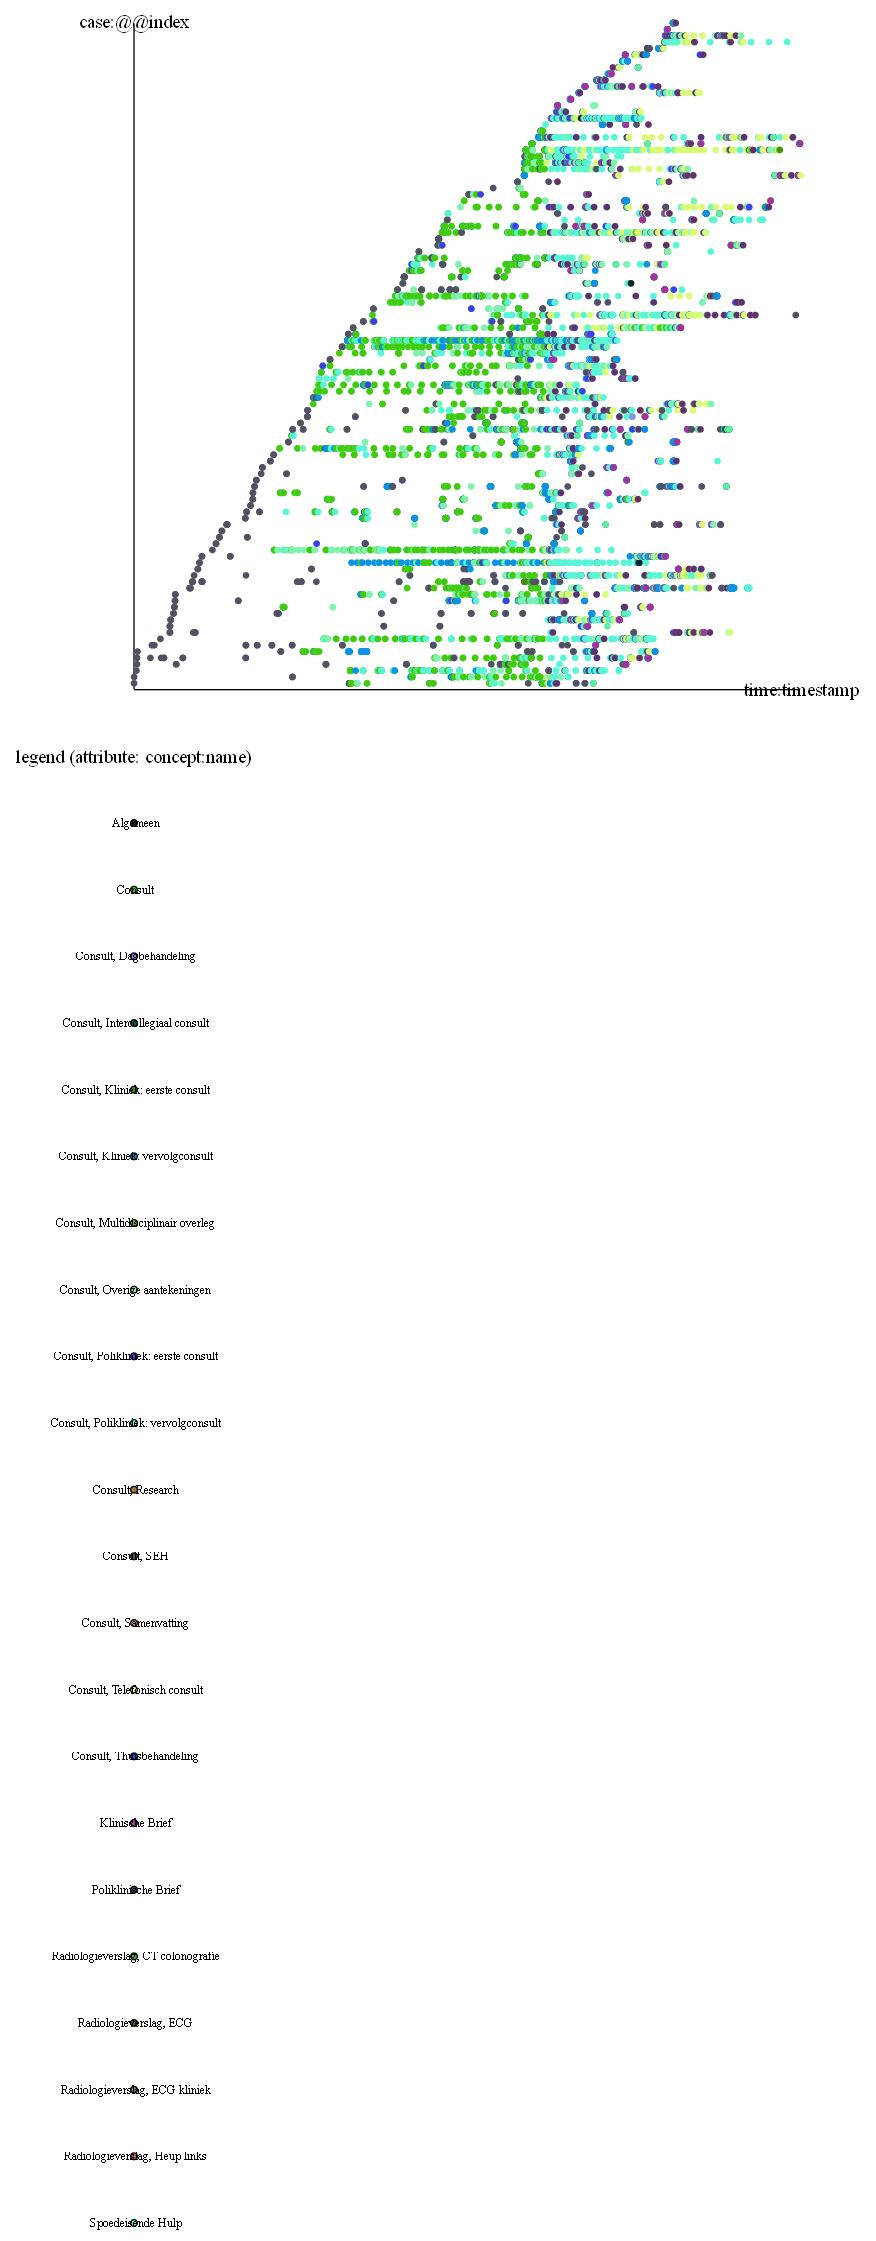

In [13]:
pm4py.view_dotted_chart(event_log)

In [14]:
case_arrival = pm4py.get_case_arrival_average(df_verslagen)
case_arrival

np.float64(4643978.653846154)

In [15]:
# from pm4py.algo.filtering.log.variants import variants_filter
# # from pm4py.objects.conversion.log import converter as log_converter

# log = event_log

# # Extract unique variants (patient journey patterns)
# variants = variants_filter.get_variants(log)
# trace_list = ['->'.join(trace) for trace in variants.keys()]

# # Create a DataFrame mapping traces to frequency
# trace_counts = {trace: len(variants[trace]) for trace in trace_list}
# trace_df = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# # Sort by most common traces
# trace_df = trace_df.sort_values(by='Count', ascending=False)
# print(trace_df.head())  # Show most common patient journeys

from pm4py.algo.filtering.log.variants import variants_filter

# Extract unique variants (patient journey patterns)
variants = variants_filter.get_variants(event_log)

# Map original tuple traces to string traces
trace_mapping = {tuple(trace): '->'.join(trace) for trace in variants.keys()}

# Create a DataFrame mapping traces to frequency
trace_counts = {trace_mapping[trace]: len(variants[trace]) for trace in variants.keys()}

# Convert to DataFrame
trace_df = pd.DataFrame(list(trace_counts.items()), columns=['Trace', 'Count'])

# Sort by most common traces
trace_df = trace_df.sort_values(by='Count', ascending=False)

print(trace_df)  # Show most common patient journeys



                                                 Trace  Count
0    Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
1    Consult, SEH->Consult, SEH->Consult, Kliniek: ...      1
2    Consult, SEH->Spoedeisende Hulp->Consult, Klin...      1
3    Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
4    Consult, SEH->Consult->Consult->Consult, Overi...      1
..                                                 ...    ...
100  Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
101  Consult, SEH->Consult, SEH->Consult, Overige a...      1
102  Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1
103  Consult, SEH->Consult, SEH->Consult, Kliniek: ...      1
104  Consult, SEH->Consult, SEH->Consult, SEH->Cons...      1

[105 rows x 2 columns]


In [16]:
from pm4py.algo.transformation.log_to_features import algorithm as log_to_features
from sklearn.cluster import KMeans
import numpy as np

log = event_log

# Convert event log to feature vectors
feature_table, feature_names = log_to_features.apply(log, parameters={"feature_type": "frequency"})

# Convert to DataFrame
feature_df = pd.DataFrame(feature_table, columns=feature_names)

# Apply K-Means clustering (set k=3 for 3 clusters)
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
feature_df['Cluster'] = kmeans.fit_predict(feature_df)

print(feature_df.head())  # Show clustered patient traces


c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Het systeem kan het opgegeven bestand niet vinden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Y.vanMegen\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executabl

   @@index  @@case_index  concept:name_Consult,SEH  \
0     37.0           0.0                       1.0   
1    210.0           1.0                       1.0   
2    264.0           2.0                       1.0   
3    346.0           3.0                       1.0   
4    624.0           4.0                       1.0   

   concept:name_Consult,Overigeaantekeningen  \
0                                        1.0   
1                                        1.0   
2                                        0.0   
3                                        1.0   
4                                        1.0   

   concept:name_Consult,Polikliniek:eersteconsult  concept:name_Consult  \
0                                             1.0                   1.0   
1                                             1.0                   1.0   
2                                             1.0                   0.0   
3                                             1.0                   1.0   
4          

In [17]:
import plotly.graph_objects as go
from collections import Counter

# Extract most common sequence per cluster
cluster_sequences = feature_df.groupby("Cluster").sum().idxmax(axis=1)
cluster_counts = Counter(cluster_sequences)

# Sankey Diagram Data Preparation
sources, targets = [], []
for trace in cluster_sequences.values:
    steps = trace.split("->")
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert to indices
all_nodes = list(set(sources + targets))
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=list(cluster_counts.values()))
))
fig.show()


In [18]:
# pip install plotly

In [19]:
# !pip install --upgrade nbformat

In [20]:
from collections import Counter

def get_sub_traces(trace, window_size):
    """Extracts sub-traces of a given window size from a full trace."""
    return ['->'.join(trace[i:i+window_size]) for i in range(len(trace) - window_size + 1)]

# Extract unique variants (trace paths)
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(event_log)
# print('variants', variants)

# Convert traces from tuples to lists
trace_list = [list(trace) for trace in variants.keys()]
# print('trace_list', trace_list)

# Extract all sub-traces
window_size = 10  # Adjust window size as needed
all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
# print('all_sub_traces', all_sub_traces)

# Count frequency of sub-traces
sub_trace_counts = Counter(all_sub_traces)

# Convert to DataFrame for sorting
import pandas as pd
sub_trace_df = pd.DataFrame(sub_trace_counts.items(), columns=['Sub-Trace', 'Count'])
sub_trace_df = sub_trace_df.sort_values(by='Count', ascending=False)

sub_trace_df.head(10) # Show most common sub-traces


,Sub-Trace,Count
31,"Consult, Kliniek: vervolgconsult->Consult, Kli...",135
293,"Consult, Polikliniek: vervolgconsult->Consult-...",47
3676,"Consult, Polikliniek: vervolgconsult->Consult,...",42
2210,"Consult, SEH->Consult, SEH->Consult, SEH->Cons...",41
294,"Consult->Consult, Polikliniek: vervolgconsult-...",38
267,"Consult, Kliniek: vervolgconsult->Consult->Con...",22
266,"Consult->Consult, Kliniek: vervolgconsult->Con...",19
3796,Consult->Consult->Consult->Consult->Consult->C...,15
1315,"Consult, SEH->Consult, SEH->Consult, SEH->Cons...",14
173,"Consult, Kliniek: vervolgconsult->Consult, Kli...",14


In [21]:
sub_trace_df.iloc[0][0], sub_trace_df.iloc[0][1]

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_11268\2768540017.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



('Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult',
 np.int64(135))

In [22]:
for i in range(5):
    print(sub_trace_df.iloc[i][0], 'count:', sub_trace_df.iloc[i][1])

Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult->Consult, Kliniek: vervolgconsult count: 135
Consult, Polikliniek: vervolgconsult->Consult->Consult, Polikliniek: vervolgconsult->Consult->Consult, Polikliniek: vervolgconsult->Consult->Consult, Polikliniek: vervolgconsult->Consult->Consult, Polikliniek: vervolgconsult->Consult count: 47
Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult->Consult, Polikliniek: vervolgconsult count: 42
Consult, SEH->Con

C:\Users\Y.vanMegen\AppData\Local\Temp\ipykernel_11268\1546644206.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [23]:
def diversity_score(sub_trace_counts):
    unique_sub_traces = len(sub_trace_counts)
    total_sub_traces = sum(sub_trace_counts.values())
    return unique_sub_traces / total_sub_traces  # Ratio of unique sequences

for n in range(2, 20):
    all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, n)]
    sub_trace_counts = Counter(all_sub_traces)
    
    score = diversity_score(sub_trace_counts)
    print(f"Window Size {n}: Diversity Score = {score:.4f}")


Window Size 2: Diversity Score = 0.0201
Window Size 3: Diversity Score = 0.0846
Window Size 4: Diversity Score = 0.2208
Window Size 5: Diversity Score = 0.3928
Window Size 6: Diversity Score = 0.5471
Window Size 7: Diversity Score = 0.6669
Window Size 8: Diversity Score = 0.7567
Window Size 9: Diversity Score = 0.8225
Window Size 10: Diversity Score = 0.8694
Window Size 11: Diversity Score = 0.9034
Window Size 12: Diversity Score = 0.9281
Window Size 13: Diversity Score = 0.9458
Window Size 14: Diversity Score = 0.9594
Window Size 15: Diversity Score = 0.9692
Window Size 16: Diversity Score = 0.9754
Window Size 17: Diversity Score = 0.9804
Window Size 18: Diversity Score = 0.9838
Window Size 19: Diversity Score = 0.9860


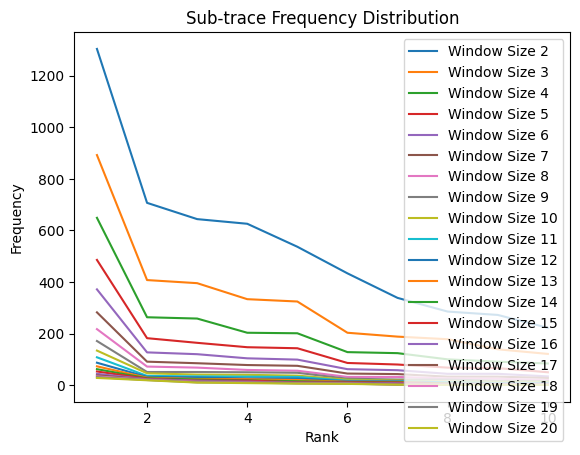

In [24]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to test different window sizes
def test_window_sizes(trace_list, max_n=20):
    for window_size in range(2, max_n + 1):
        all_sub_traces = [sub_trace for trace in trace_list for sub_trace in get_sub_traces(trace, window_size)]
        sub_trace_counts = Counter(all_sub_traces)
        
        # Get top 10 frequent sub-traces
        top_counts = sorted(sub_trace_counts.values(), reverse=True)[:10]
        
        plt.plot(range(1, len(top_counts) + 1), top_counts, label=f'Window Size {window_size}')

    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Sub-trace Frequency Distribution')
    plt.legend()
    plt.show()

test_window_sizes(trace_list)


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert full traces into "sentences" (for NLP processing)
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)

# Cluster Traces Using K-Means
num_clusters = 10  # Change based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
trace_clusters = kmeans.fit_predict(X)

# Add cluster labels to traces
clustered_traces = pd.DataFrame({'Trace': trace_sentences, 'Cluster': trace_clusters})
print(clustered_traces.sort_values(by='Cluster'))


                                                Trace  Cluster
39  Consult, SEH Consult, SEH Consult, SEH Consult...        0
89  Consult, SEH Consult, SEH Consult, Overige aan...        0
9   Consult, SEH Consult, SEH Consult, Polikliniek...        1
11  Consult, SEH Consult, SEH Consult, SEH Consult...        1
25  Consult, SEH Consult, SEH Consult, SEH Consult...        1
..                                                ...      ...
69  Consult, SEH Consult, SEH Consult, SEH Consult...        9
86  Consult, SEH Consult, SEH Consult, SEH Consult...        9
72  Consult, Polikliniek: eerste consult Consult C...        9
73  Consult, Overige aantekeningen Consult, SEH Co...        9
82  Consult Consult Consult, Polikliniek: vervolgc...        9

[105 rows x 2 columns]


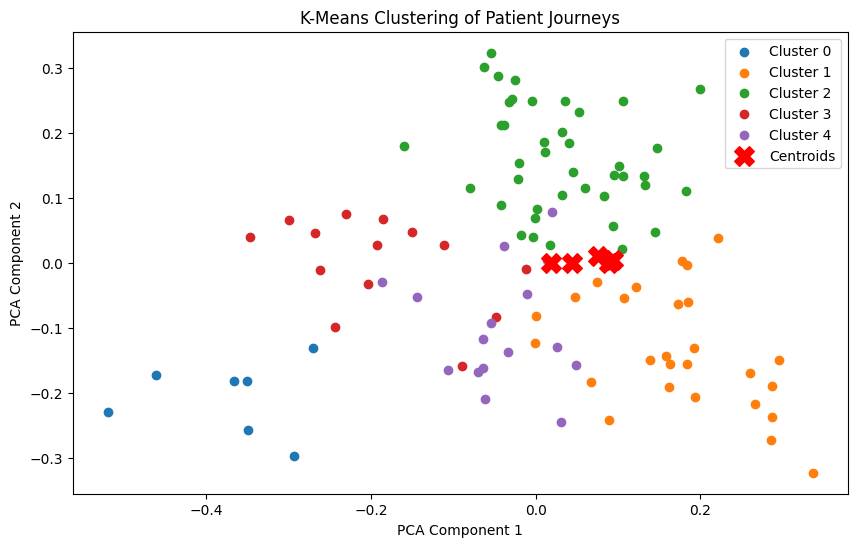

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert traces to "sentences"
trace_sentences = [' '.join(trace) for trace in trace_list]

# Apply TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trace_sentences)

# Apply K-Means clustering
num_clusters = 5  # Adjust based on data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Patient Journeys')
plt.legend()
plt.show()

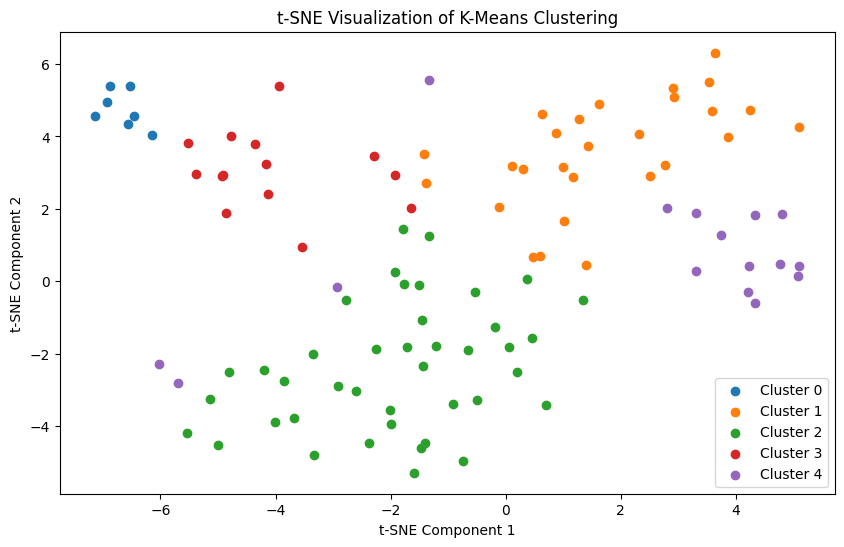

In [27]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X_tsne[clusters == i, 0], X_tsne[clusters == i, 1], label=f'Cluster {i}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of K-Means Clustering')
plt.legend()
plt.show()


In [28]:
import plotly.graph_objects as go
import numpy as np

# Ensure clusters is a NumPy array of integers
clusters = np.array(clusters, dtype=int)

# Verify the number of clusters
num_clusters = len(np.unique(clusters))

trace_sentences = np.array(trace_sentences)
print(trace_sentences)

# Sample patient journey per cluster
sample_traces = {i: trace_sentences[clusters == i][:5] for i in range(num_clusters)}

# Create Sankey diagram
fig = go.Figure()
for i, (cluster, traces) in enumerate(sample_traces.items()):
    fig.add_trace(go.Sankey(
        node=dict(
            pad=15, thickness=20,
            label=['Start'] + [f'Step {j+1}' for j in range(len(traces[0].split()))]
        ),
        link=dict(
            source=[0] * len(traces),
            target=list(range(1, len(traces[0].split()) + 1)),
            value=[1] * len(traces)
        )
    ))

fig.update_layout(title_text="Sankey Diagram of Clustered Patient Journeys")
fig.show()


['Consult, SEH Consult, SEH Consult, SEH Consult, SEH Consult, SEH Consult, SEH Consult, SEH Consult, SEH Consult, Overige aantekeningen Consult, Overige aantekeningen Consult, Polikliniek: eerste consult Consult Consult Consult, Polikliniek: vervolgconsult Consult Consult, SEH Consult, SEH Consult, Polikliniek: vervolgconsult Consult, SEH Consult, SEH Consult, SEH Consult Consult, Kliniek: eerste consult Consult, Kliniek: vervolgconsult Consult Consult, Kliniek: vervolgconsult Consult Consult Consult, Kliniek: vervolgconsult Consult Consult, SEH Spoedeisende Hulp Consult, Kliniek: vervolgconsult Consult, Kliniek: vervolgconsult Poliklinische Brief Poliklinische Brief Consult, Kliniek: vervolgconsult Klinische Brief'
 'Consult, SEH Consult, SEH Consult, Kliniek: vervolgconsult Consult, Kliniek: vervolgconsult Consult, Kliniek: vervolgconsult Consult, Kliniek: vervolgconsult Consult, Kliniek: vervolgconsult Consult, Kliniek: vervolgconsult Consult, Kliniek: vervolgconsult Consult, Klini

In [29]:
import plotly.graph_objects as go
from collections import Counter

# Step 1: Extract Sequences from event columns
event_columns = [col for col in feature_df.columns if 'concept:name' in col]  # Filter for event-related columns
sequences = []

# For each row in feature_df, extract the sequence of events
for _, row in feature_df.iterrows():
    events = [col.split('concept:name_')[1] for col in event_columns if row[col] == 1.0]  # Get events with 1.0 value
    sequences.append('->'.join(events))  # Join events into a sequence

# Step 2: Add sequences to the dataframe (this will be useful for visualization)
feature_df['Sequence'] = sequences

# Step 3: Get the most common sequence per cluster 
cluster_sequences = feature_df.groupby("Cluster")["Sequence"].agg(lambda x: x.mode()[0])

# Step 4: Count the occurrences of each sequence (for Sankey diagram links)
cluster_counts = Counter(cluster_sequences)

# Step 5: Prepare data for Sankey diagram (convert sequences into sources and targets)
sources, targets = [], []

for trace in cluster_sequences.values:
    steps = trace.split("->")  # Split sequence into individual steps
    for i in range(len(steps) - 1):
        sources.append(steps[i])
        targets.append(steps[i + 1])

# Convert sources and targets to indices (for Sankey diagram nodes)
all_nodes = list(set(sources + targets))  # All unique nodes (steps)
source_indices = [all_nodes.index(s) for s in sources]
target_indices = [all_nodes.index(t) for t in targets]

# Step 6: Count the frequency of each link (source -> target pair)
link_counts = Counter(zip(sources, targets))
values = [link_counts[(source, target)] for source, target in zip(sources, targets)]

# Step 7: Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(label=all_nodes),
    link=dict(source=source_indices, target=target_indices, value=values)
))

fig.show()
